<a href="https://colab.research.google.com/github/MahfuzaRU/Artificial-Intelligence/blob/main/Digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import section
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mnist_custom.npz to mnist_custom.npz


In [11]:
from google.colab import files
uploaded = files.upload()


Saving my_dataset.npz to my_dataset.npz


In [12]:
#Load dataset
def load_data(path="/content/my_dataset.npz"):
  data = np.load(path)
  X_train = data['x_train']
  X_test = data['x_test']
  y_train = data['y_train']
  y_test = data['y_test']
  print("Train:", X_train.shape, " Test:", X_test.shape)
  return X_train, X_test, y_train, y_test

In [13]:
# Normalize dataset
def normalize_data(X_train, X_test):
  X_train = X_train.astype("float32") / 255.0
  X_test = X_test.astype("float32") / 255.0
  return X_train, X_test

In [14]:
def build_model():
    inputs = Input((28, 28))
    x = Flatten()(inputs)

    x = Dense(1024, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)

    outputs = Dense(10, activation="softmax")(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [26]:
def train_model(model, X_train, y_train, X_test, y_test):
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stop, lr_schedule],
        verbose=2
    )
    return history

In [27]:
#  Plot Training
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Train: (2084, 28, 28, 1)  Test: (522, 28, 28, 1)
Epoch 1/200
66/66 - 5s - 77ms/step - accuracy: 0.2394 - loss: 2.3577 - val_accuracy: 0.1973 - val_loss: 2.1980 - learning_rate: 1.0000e-04
Epoch 2/200
66/66 - 2s - 31ms/step - accuracy: 0.4573 - loss: 1.6646 - val_accuracy: 0.2452 - val_loss: 2.0724 - learning_rate: 1.0000e-04
Epoch 3/200
66/66 - 1s - 22ms/step - accuracy: 0.5465 - loss: 1.4119 - val_accuracy: 0.3659 - val_loss: 1.9349 - learning_rate: 1.0000e-04
Epoch 4/200
66/66 - 3s - 38ms/step - accuracy: 0.6214 - loss: 1.2000 - val_accuracy: 0.4559 - val_loss: 1.7482 - learning_rate: 1.0000e-04
Epoch 5/200
66/66 - 3s - 38ms/step - accuracy: 0.6545 - loss: 1.0762 - val_accuracy: 0.5115 - val_loss: 1.5470 - learning_rate: 1.0000e-04
Epoch 6/200
66/66 - 3s - 43ms/step - accuracy: 0.6939 - loss: 0.9984 - val_accuracy: 0.6111 - val_loss: 1.3604 - learning_rate: 1.0000e-04
Epoch 7/200
66/66 - 1s - 22ms/step - accuracy: 0.7313 - loss: 0.8852 - val_accuracy: 0.6590 - val_loss: 1.1733 - lear

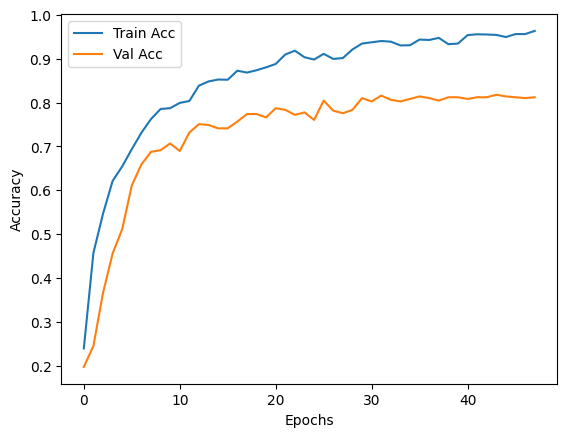

Final Test Accuracy: 80.65%


In [28]:
# Main Execution
# -----------------------------
X_train, X_test, y_train, y_test = load_data()
X_train, X_test = normalize_data(X_train, X_test)
model = build_model()
history = train_model(model, X_train, y_train, X_test, y_test)
plot_history(history)

# Final evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {acc*100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


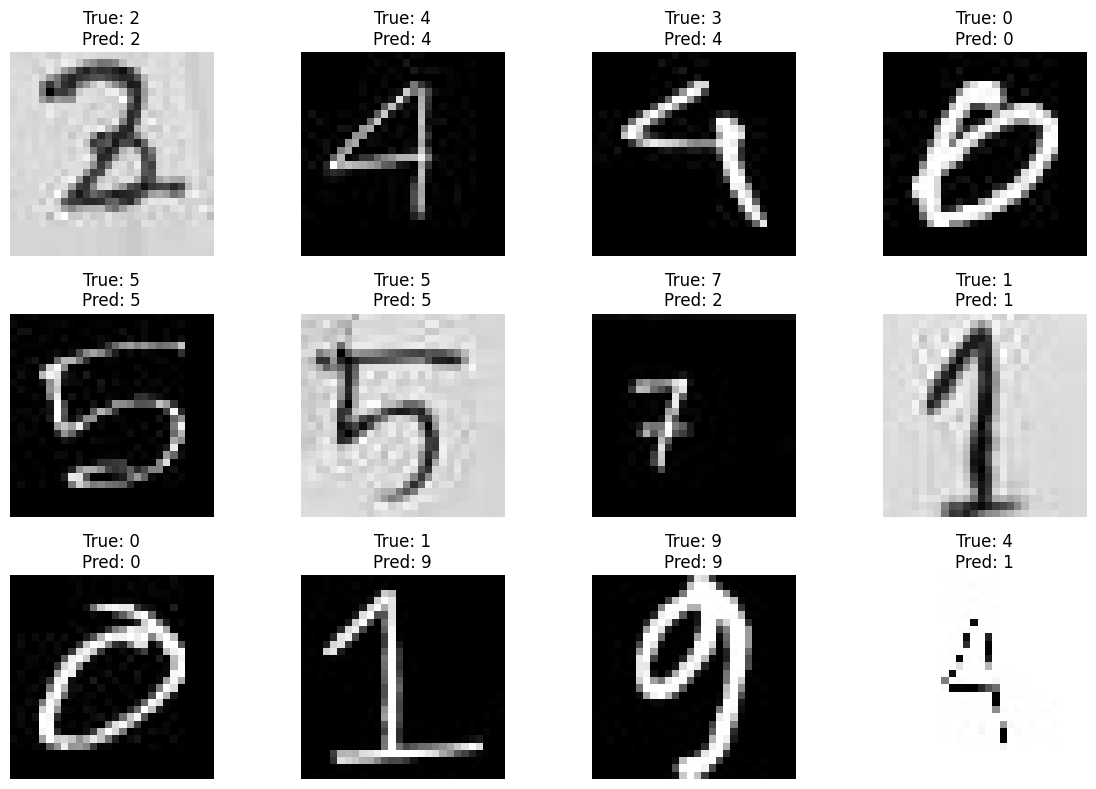

In [29]:
# Predict test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Randomly কিছু sample বেছে নেই
num_samples = 12
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 4, i+1)   # 3x4 grid = 12 images
    plt.imshow(X_test[idx], cmap="gray")
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
